# Decison Trees

### 1 Objective
Implement a decision tree classifier using the Titanic dataset to predict survival
and evaluate the model’s accuracy.

### 2 Tasks
1. Data Loading and Preprocessing
```
(a) Load the Titanic dataset from the provided location URL for Dataset
into a DataFrame.
(b) Print the first few rows of the DataFrame to examine the data structure.
(c) Print the column names of the dataset.
(d) Perform statistical analysis using describe() to understand the dataset
better.
(e) Identify and handle missing values.
(f) Convert categorical variables into numerical labels using LabelEncoder.
```

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# (a) Load the Titanic dataset from the provided location URL for Dataset into a DataFrame.
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# (b) Print the first few rows of the DataFrame to examine the data structure.
print(df.head())

# (c) Print the column names of the dataset.
print(df.columns)

# (d) Perform statistical analysis using describe() to understand the dataset better.
print(df.describe())

# (e) Identify and handle missing values.
# For simplicity, let's fill the missing values with the mean (for numerical columns) or mode (for categorical columns)
for column in df.columns:
    if df[column].dtype == np.number:  # If the column is numerical
        df[column] = df[column].fillna(df[column].mean())
    else:  # If the column is categorical
        df[column] = df[column].fillna(df[column].mode()[0])

# (f) Convert categorical variables into numerical labels using LabelEncoder.
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  # If the column is categorical
        df[column] = le.fit_transform(df[column])

print(df.head())  # Print the first few rows of the preprocessed DataFrame


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
In

C:\Users\suvam\AppData\Local\Temp\ipykernel_13496\370718872.py:22: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:  # If the column is numerical
C:\Users\suvam\AppData\Local\Temp\ipykernel_13496\370718872.py:22: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:  # If the column is numerical
C:\Users\suvam\AppData\Local\Temp\ipykernel_13496\370718872.py:22: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:  # If the column is numerical
C:\Users\suvam\AppData\Local\Temp\ipykernel_13496\370718872.py:22: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecate

2. Exploratory Data Analysis (EDA)
```
(a) Visualize the distribution of the target variable ’Survived’ using a
histogram.
(b) Plot pair plots to explore the relationships between various features.
```

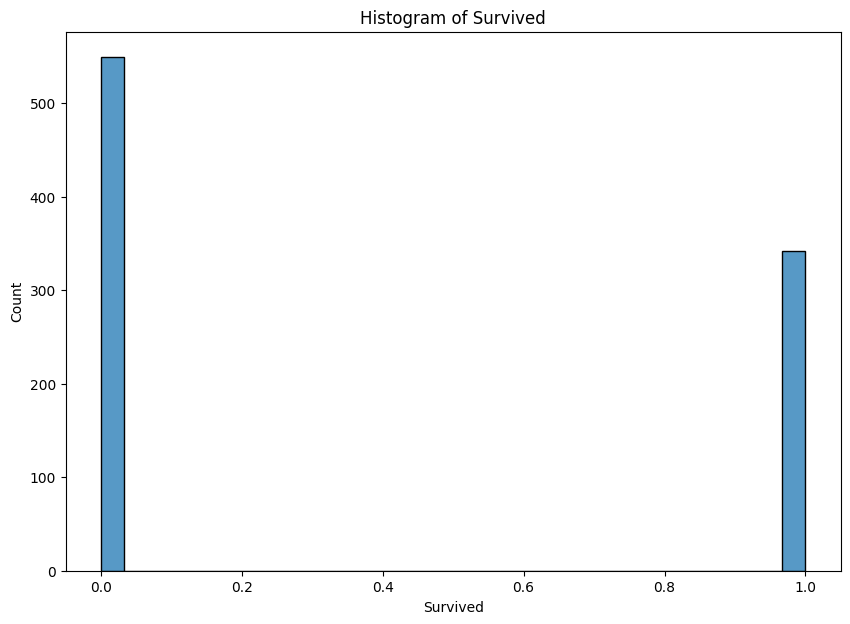

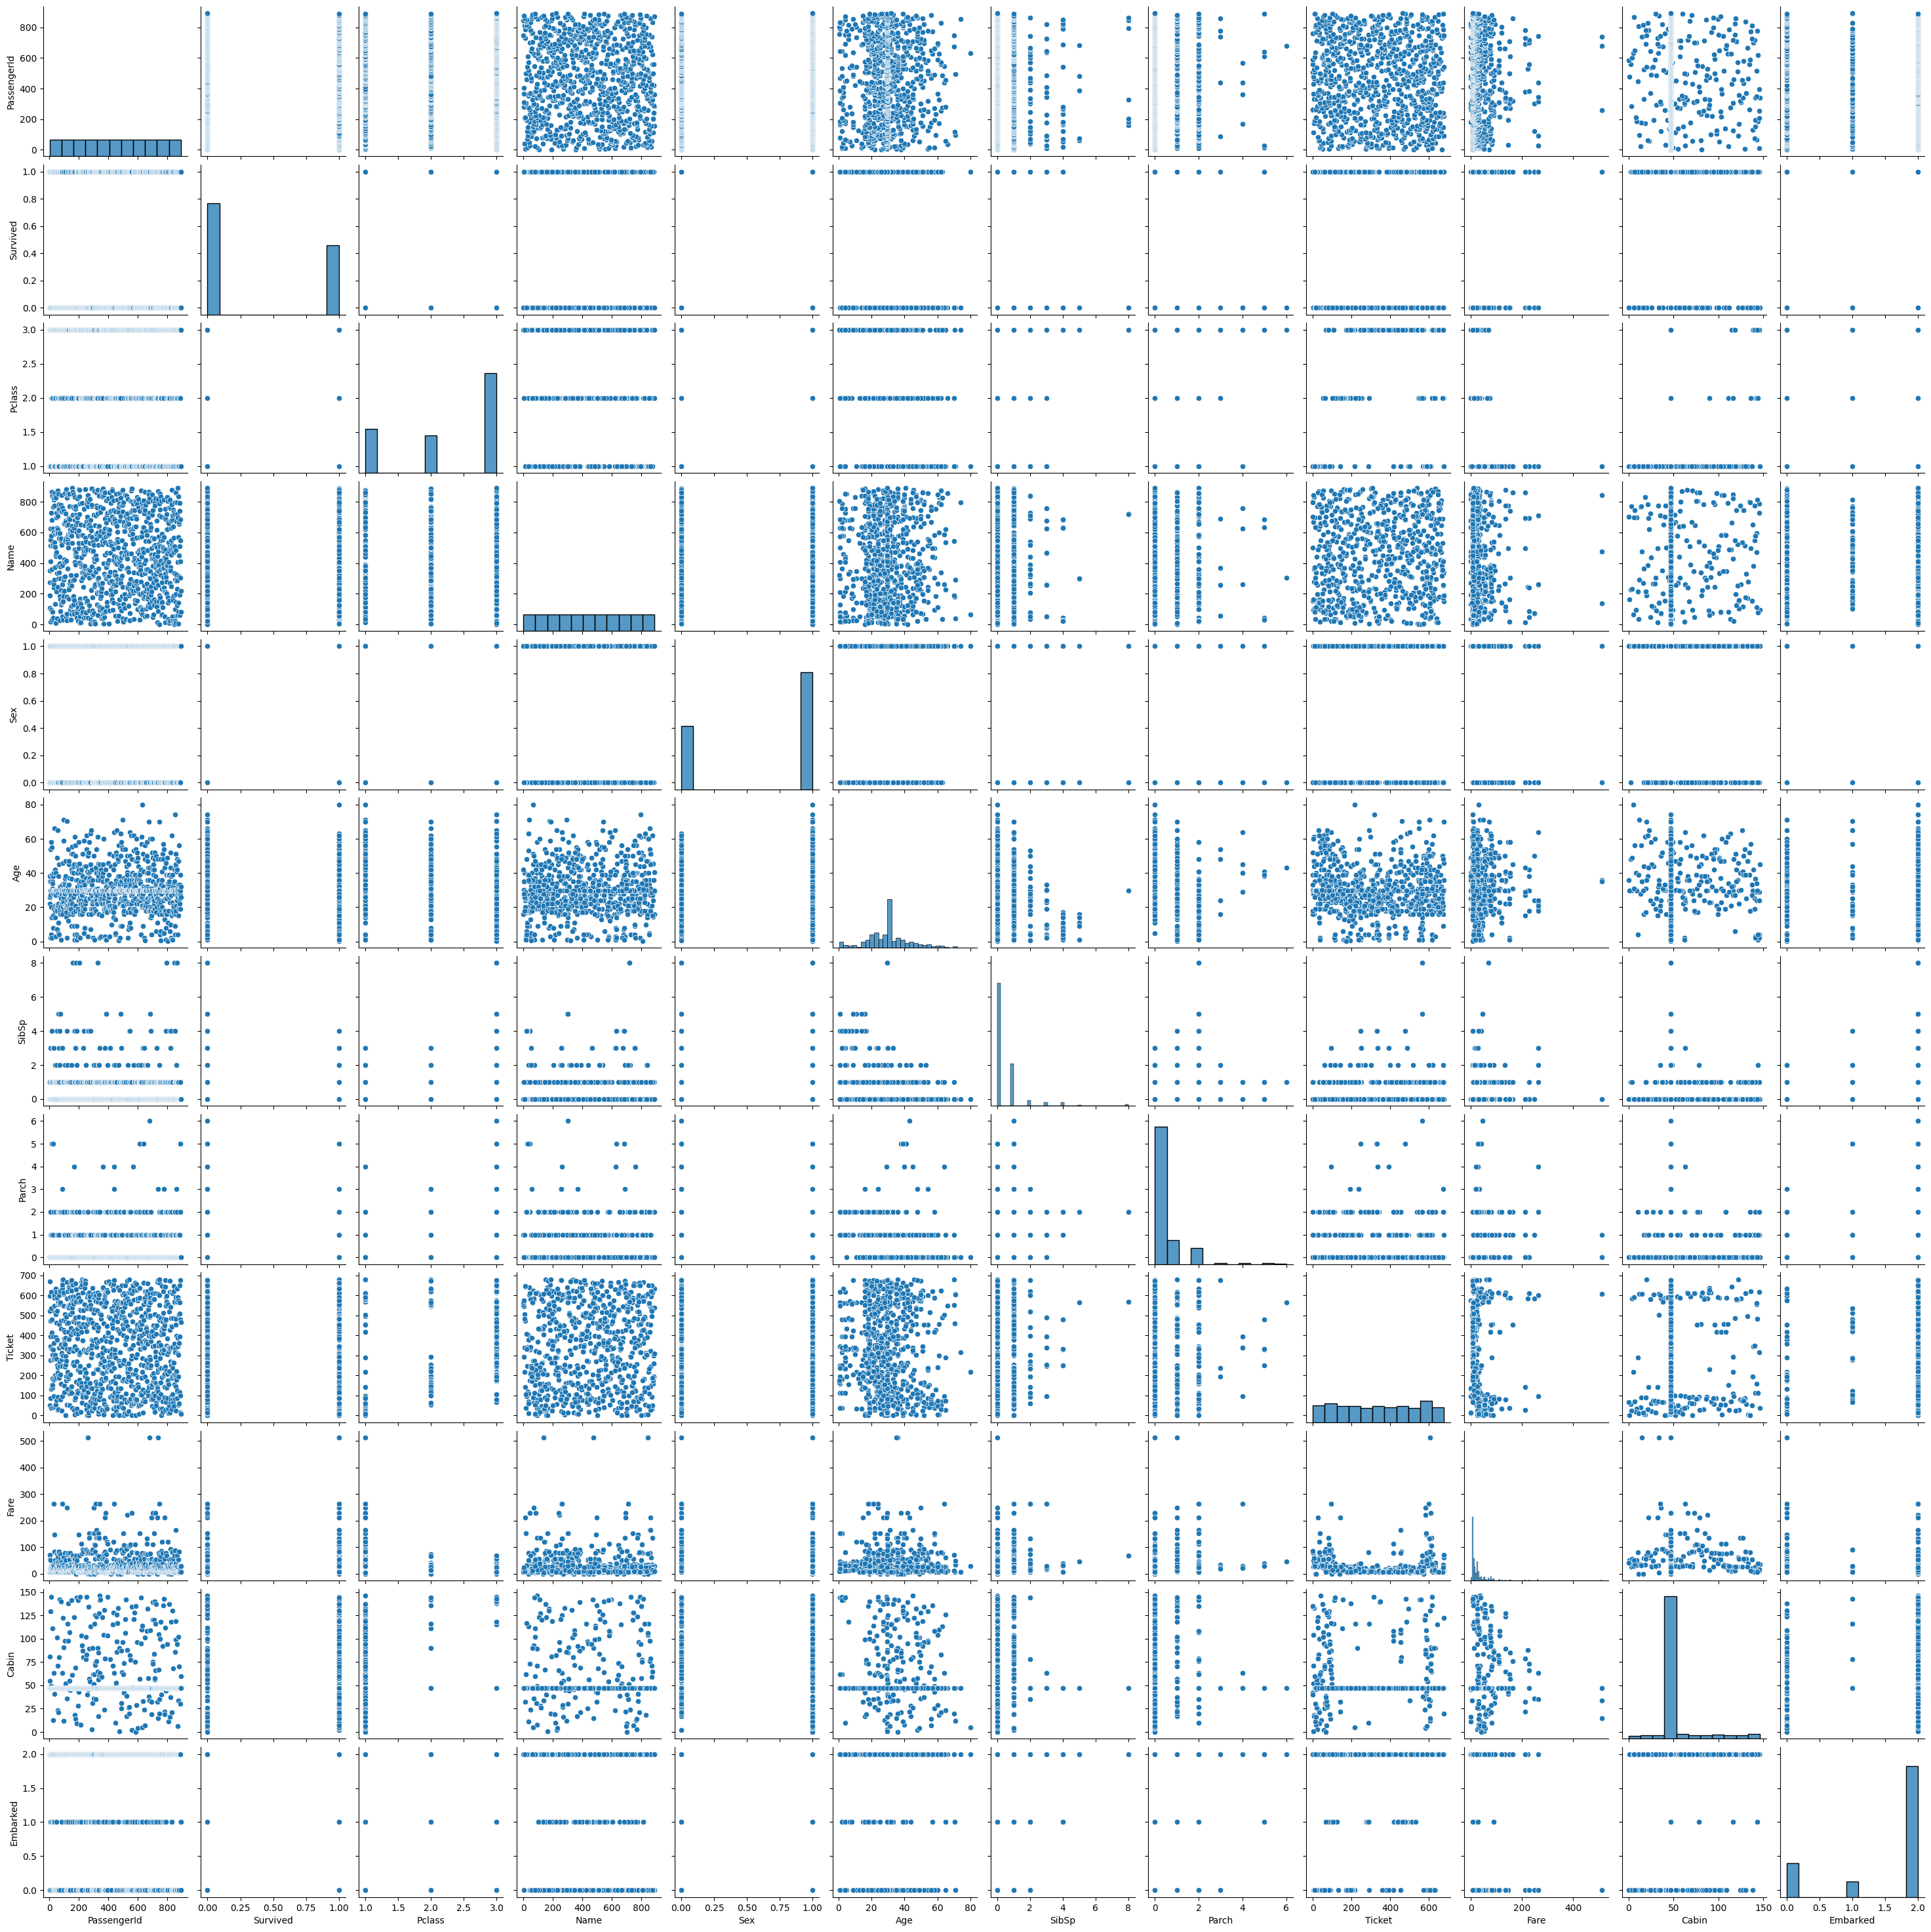

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# (a) Visualize the distribution of the target variable ’Survived’ using a histogram.
plt.figure(figsize=(10, 7))
sns.histplot(df['Survived'], kde=False, bins=30)
plt.title('Histogram of Survived')
plt.show()

# (b) Plot pair plots to explore the relationships between various features.
# Note: Pairplot can be very time-consuming for large datasets with many features.
sns.pairplot(df)
plt.show()


3. Model Building
```
(a) Split the dataset into independent (X) and dependent (Y) variables.
(b) Split the data into training and testing sets.
(c) Train a decision tree classifier using the DecisionTreeClassifier
from sklearn.tree.
(d) Predict the results for the test dataset.
```

In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# (a) Split the dataset into independent (X) and dependent (Y) variables.
# Let's assume 'Survived' is the target variable and the rest are features
X = df.drop('Survived', axis=1)
Y = df['Survived']

# (b) Split the data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# (c) Train a decision tree classifier using the DecisionTreeClassifier from sklearn.tree.
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

# (d) Predict the results for the test dataset.
Y_pred = clf.predict(X_test)

print(Y_pred)  # Print the predicted results


[0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0]


4. Model Evaluation
```
(a) Evaluate the accuracy of the model using metrics.accuracy score().
(b) Print the accuracy score.
```

In [4]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

# (a) Evaluate the accuracy of the model using metrics.accuracy_score().
accuracy = accuracy_score(Y_test, Y_pred)

# (b) Print the accuracy score.
print(f"The accuracy score of the model is: {accuracy}")


The accuracy score of the model is: 0.7988826815642458


### 3 Requirements
```
• Utilize Python and relevant libraries (e.g., pandas, scikit-learn).
• Provide code snippets with explanations for each step.
• Comment on the significance of the achieved accuracy.
• Submit the assignment as a Jupyter notebook.
```